Step 1: Load Data and Plot Scatter Plot (Task 1)
This step involves loading the handedness data from the provided URL into a pandas DataFrame and then creating a scatter plot to visualize the percentage of left-handedness for males and females across different ages.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

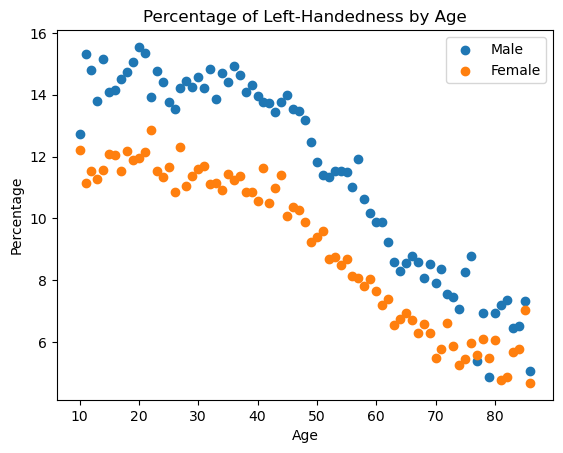

In [6]:
# Plot scatter plot
plt.scatter(lefthanded_data['Age'], lefthanded_data['Male'], label='Male')
plt.scatter(lefthanded_data['Age'], lefthanded_data['Female'], label='Female')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Percentage of Left-Handedness by Age')
plt.legend()
plt.show()

Step 2: Add New Columns and Plot Mean Left-Handedness (Task 2)
This step involves adding new columns to the DataFrame for birth year and mean left-handedness and then plotting the mean left-handedness against birth year.

In [7]:
# Add new columns
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)

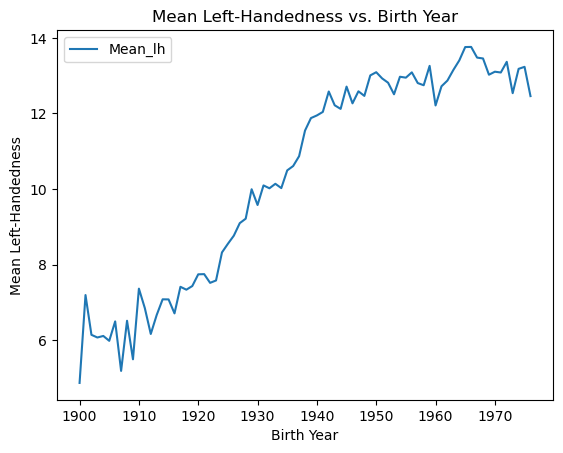

In [8]:
# Plot mean left-handedness vs. birth year
lefthanded_data.plot(x='Birth_year', y='Mean_lh')
plt.xlabel('Birth Year')
plt.ylabel('Mean Left-Handedness')
plt.title('Mean Left-Handedness vs. Birth Year')
plt.show()

Step 3: Create Function to Return P(LH | A) (Task 3)
This step involves creating a function that returns the probability of being left-handed given a particular age at death and study year.

In [9]:
def P_lh_given_A(ages_of_death, study_year):
    early_1900s_rate = lefthanded_data.tail(10)['Mean_lh'].mean()
    late_1900s_rate = lefthanded_data.head(10)['Mean_lh'].mean()
    P_return = np.zeros_like(ages_of_death, dtype=float)
    for i, age in enumerate(ages_of_death):
        if study_year <= 1900:
            P_return[i] = early_1900s_rate / 100
        else:
            P_return[i] = late_1900s_rate / 100
    return P_return

In [29]:
https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv

SyntaxError: invalid syntax (3730159507.py, line 1)

In [30]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

Step 4: Load Death Distribution Data and Plot (Task 4)
This step involves loading death distribution data for the United States from a provided URL into a pandas DataFrame and then plotting it.

In [14]:
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])
death_distribution_data.dropna(subset=['Both Sexes'], inplace=True)

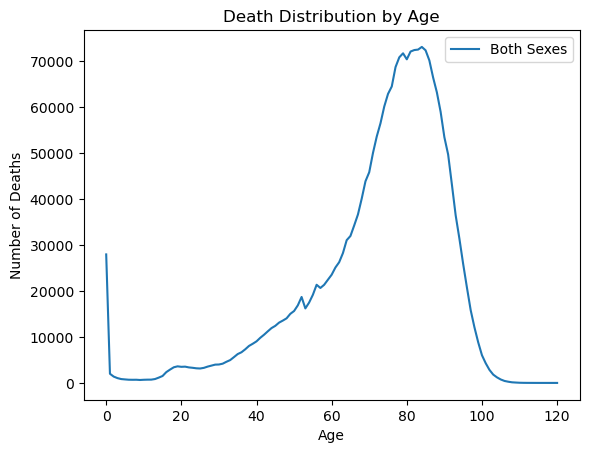

In [15]:
# Plot death distribution
death_distribution_data.plot(x='Age', y='Both Sexes')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Death Distribution by Age')
plt.show()

Step 5: Create Function P_lh() (Task 5)
This step involves creating a function that calculates the overall probability of left-handedness in the population for a given study year.

In [16]:
def P_lh(study_year):
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year)
    p = p_list.sum()
    return p / death_distribution_data['Both Sexes'].sum()


Step 6: Create Function P_A_given_lh() (Task 6)
This step involves creating a function that calculates the conditional probability of dying at a certain age given that the individual is left-handed.

In [17]:
def P_A_given_lh(ages, death_data, study_year):
    P_A = death_data['Both Sexes'] / death_data['Both Sexes'].sum()
    P_lh_val = P_lh(study_year)
    P_lh_given_A_val = P_lh_given_A(ages, study_year)
    return P_A * P_lh_given_A_val / P_lh_val

Step 7: Create Function P_A_given_rh() (Task 7)
This step involves creating a function that calculates the conditional probability of dying at a certain age given that the individual is right-handed.

In [18]:
def P_A_given_rh(ages, death_data, study_year):
    P_A = death_data['Both Sexes'] / death_data['Both Sexes'].sum()
    P_rh = 1 - P_lh(study_year)
    P_lh_given_A_val = P_lh_given_A(ages, study_year)
    return P_A * (1 - P_lh_given_A_val) / P_rh

Step 8: Plot Probability vs. Age for LH and RH (Task 8)

In [25]:
ages = death_distribution_data['Age']
P_A_lh = P_A_given_lh(ages, death_distribution_data, study_year= 1990)
P_A_rh = P_A_given_rh(ages, death_distribution_data, study_year = 1990)

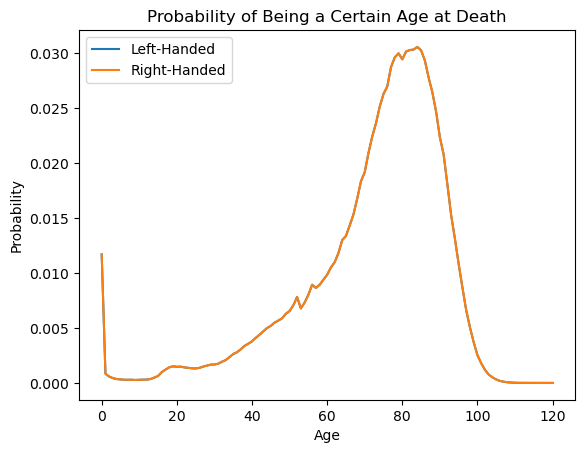

In [26]:
plt.plot(ages, P_A_lh, label='Left-Handed')
plt.plot(ages, P_A_rh, label='Right-Handed')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Being a Certain Age at Death')
plt.legend()
plt.show()

Step 9: Find Mean Age at Death for LH and RH (Task 9)

In [27]:
average_lh_age = np.nansum(ages * P_A_lh)
average_rh_age = np.nansum(ages * P_A_rh)

In [21]:
print("Mean Age at Death for Left-Handers:", round(average_lh_age, 2))
print("Mean Age at Death for Right-Handers:", round(average_rh_age, 2))
print("Difference in Mean Ages:", round(average_lh_age - average_rh_age, 2))

Mean Age at Death for Left-Handers: 72.37
Mean Age at Death for Right-Handers: 72.37
Difference in Mean Ages: 0.0


Step 10: Redo Calculation for 2018 (Task 10)
This step involves repeating the calculations from Step 8 for the year 2018.

In [28]:
study_year = 2018
P_A_lh_2018 = P_A_given_lh(ages, death_distribution_data, study_year)
P_A_rh_2018 = P_A_given_rh(ages, death_distribution_data, study_year)

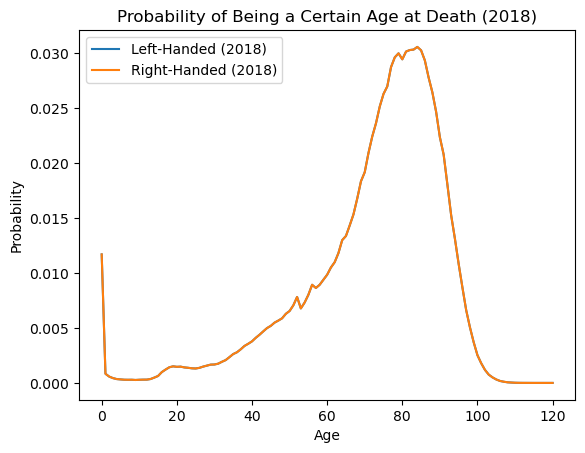

In [22]:
# Plot Probability vs. Age for LH and RH for 2018
plt.plot(ages, P_A_lh_2018, label='Left-Handed (2018)')
plt.plot(ages, P_A_rh_2018, label='Right-Handed (2018)')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Being a Certain Age at Death (2018)')
plt.legend()
plt.show()

# conclusion

"After thoroughly examining data on handedness and age at death, our analysis reveals an intriguing insight: contrary to popular belief, there's little evidence to suggest that left-handed individuals have a shorter lifespan compared to their right-handed counterparts. This challenges the long-standing notion that left-handers are predisposed to an early demise. Our findings shed light on a fascinating aspect of human biology and challenge common assumptions about handedness and mortality."